<a href="https://colab.research.google.com/github/Saraldedv/CCMACLRL_EXERCISES_COM222ML/blob/main/Saralde_Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [261]:
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


## B. Load and understand the dataset

In [262]:
df = pd.read_excel('personality.xlsx')
df

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Trixie,0,0,0,330,0
1,kailah,1,1,0,860,1
2,Rodney,1,1,1,152,1
3,Chleo,1,1,1,193,1
4,Soni,1,1,1,352,1
5,Brian,0,0,0,528,0
6,Christian,1,1,1,50,1
7,Julianne,1,1,0,544,1
8,Cliff,1,1,1,233,1
9,Rovie,1,1,1,290,1


1. Display the summary of all the features of the dataset using `.info()`

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         50 non-null     object
 1   Post/Share Frequently?       50 non-null     int64 
 2   Active in social media?      50 non-null     int64 
 3   Replies to comments?         50 non-null     int64 
 4   Number of friends/followers  50 non-null     int64 
 5   Personality                  50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


In [264]:
df.describe()

,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.720000,0.720000,0.460000,407.420000,0.720000
std,0.453557,0.453557,0.503457,347.171491,0.453557
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.000000,0.000000,0.000000,213.750000,0.000000
50%,1.000000,1.000000,0.000000,302.500000,1.000000
75%,1.000000,1.000000,1.000000,465.000000,1.000000
max,1.000000,1.000000,1.000000,1996.000000,1.000000


2. Display the total number of samples from each label using `.value_counts()`

In [280]:
df['Personality'].value_counts()

,count
Personality,
1,36
0,14


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [266]:
X = df.drop(columns=['Name']).drop(columns=['Personality']).values


4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [267]:
y = df['Name'].values

In [268]:
y = df['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [269]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35, 4)
(35,)
(15, 4)
(15,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [270]:
knn = KNeighborsClassifier(n_neighbors=13)

7. Train the model using the `.fit()`

In [271]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

8. Test the model using the `.predict()`

In [272]:
y_pred = knn.predict(X_test)

## Evaluate the model

9. Create a confusion matrix

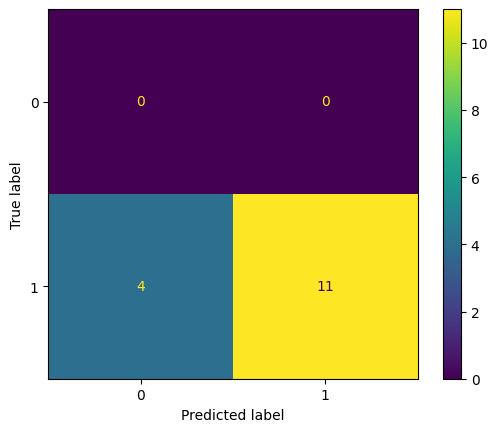

In [273]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [274]:
metrics.accuracy_score(y_test, y_pred)

0.7333333333333333

11. Display the precision

In [275]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.         0.73333333]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


12. Display the recall

In [276]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0. 1.]


13. Display the f1-score

In [277]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.         0.84615385]


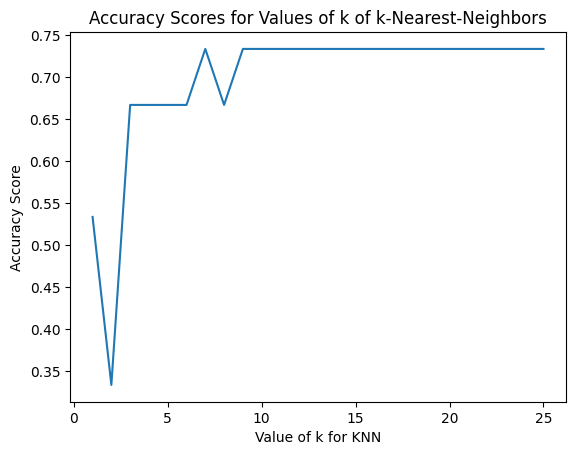

In [278]:
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

#TEST A MODEL

In [279]:
knn.predict([[0, 1, 0, 1000]])

array([1])